<a href="https://colab.research.google.com/github/kngkmsg/signate/blob/main/signate_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🖋 Signateのテンプレート作成
# 作成日：2025/05/07
# 更新日：2025/05/08
# 内容：テンプレ作成／マウント処理追加／

# Google Driveへのマウント処理
import os
from google.colab import drive

def safe_mount_drive():
    try:
        from google.colab import drive
        if not os.path.ismount('/content/drive'):
            drive.mount('/content/drive')
            print("✅ Google Driveが正常にマウントされました。")
        else:
            print("✅ Google Driveは既にマウントされています。")
    except ImportError:
        print("⚠️ このコードはColab専用です。ローカル環境では不要です。")
safe_mount_drive()

# === 0. ライブラリのインポート ===
import pandas as pd
import matplotlib.pyplot as plt

# === 1. データの読み込み ===
# Colabで使う場合は先にファイルをアップロードしておく
# ⚠️ファイル名をコンペに応じて調整⚠️
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

# === 2. データの基本情報の確認 ===
print("【データのサイズ】")
print("train:", train.shape)
print("test :", test.shape)

print("\n【データの概要（型・欠損）】")
print(train.info())

print("\n【先頭5行の確認】")
print(train.head())

# === 3. 欠損値のチェック ===
print("\n【欠損値のある列】")
missing = train.isnull().sum()
missing = missing[missing > 0]
print(missing)

# === 4. ターゲット（目的変数）の基本統計量 ===
# ⚠️ターゲットカラム名をコンペに応じて調整⚠️
target_col = '取引価格（総額）'

print("\n【目的変数の基本統計】")
print(train[target_col].describe())

# === 5. ターゲットの分布をヒストグラムで確認 ===
plt.hist(train[target_col], bins=50)
plt.title("取引価格（総額）の分布")
plt.xlabel("価格")
plt.ylabel("件数")
plt.grid(True)
plt.show()


**以下テスト**

In [ ]:
# ⚠️テンプレートテスト中⚠️

# 🖋 Signateのテンプレート作成・テスト中_2025/05/07〜

# Google Driveへのマウント処理
import os
from google.colab import drive

def safe_mount_drive():
    try:
        from google.colab import drive
        if not os.path.ismount('/content/drive'):
            drive.mount('/content/drive')
            print("✅ Google Driveが正常にマウントされました。")
        else:
            print("✅ Google Driveは既にマウントされています。")
    except ImportError:
        print("⚠️ このコードはColab専用です。ローカル環境では不要です。")
safe_mount_drive()


# === 0. ライブラリのインポート ===
import pandas as pd
import matplotlib.pyplot as plt

# === 1. データの読み込み ===
# Colabで使う場合は先にファイルをアップロードしておく
# ⚠️ファイル名をコンペに応じて調整⚠️
train = pd.read_csv("/content/drive/MyDrive/signate/お弁当販売予測_train.csv")
test = pd.read_csv("/content/drive/MyDrive/signate/お弁当販売予測_test.csv")

# === 2. データの基本情報の確認 ===
print("【データのサイズ】")
print("train:", train.shape)
print("test :", test.shape)

print("\n【データの概要（型・欠損）】")
print(train.info())

print("\n【先頭5行の確認】")
print(train.head())

# === 3. 欠損値のチェック ===
print("\n【欠損値のある列】")
missing = train.isnull().sum()
missing = missing[missing > 0]
print(missing)

# === 4. ターゲット（目的変数）の基本統計量 ===
# ⚠️ターゲットカラム名をコンペに応じて調整⚠️
target_col = 'y'

print("\n【目的変数の基本統計】")
print(train[target_col].describe())

# === 5. ターゲットの分布をヒストグラムで確認 ===
plt.hist(train[target_col], bins=50)
plt.title("取引価格（総額）の分布")
plt.title("y の分布")
plt.xlabel("y（予測対象）")
plt.grid(True)
plt.show()


下記5/11テスト中

In [ ]:
# Signateのテンプレート作成_ver.3.0

# 作成日：2025/05/08
# 更新日：2025/05/11
# 内容：テンプレ作成／マウント処理追加／日本語フォント追加／

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# 日本語フォント設定（Colab用）

# ✅ Notoフォントを取得
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("❗フォントが見つかりません。")
    font_prop = None

# ファイル読み込み関数（存在チェックあり）
def load_csv(file_path):
    if os.path.exists(file_path):
        print(f"✅ {file_path} を読み込みます。")
        return pd.read_csv(file_path, encoding="utf-8-sig")
    else:
        print(f"❌ ファイルが見つかりません: {file_path}")
        return None

# CSVファイル(train,test)の読み込み
train = load_csv("/content/drive/MyDrive/signate/お弁当販売予測_train.csv") # ← 正しいファイル名に変える
test = load_csv("/content/drive/MyDrive/signate/お弁当販売予測_test.csv") # ← 正しいファイル名に変える

# CSVファイル(sample)の読み込み
# 変数名は統一、ファイル名だけ変更できるようにする
# sample_submission.csv / sample.csv / submit_example.csv などに対応
sample_file_name = "/content/drive/MyDrive/signate/お弁当販売予測_sample.csv"  # ← ここ変えればOK
sample_submission = load_csv(sample_file_name)

# --- 基本情報の確認 ---
print("\n--- train.info() ---")
train.info()
print("\n--- train.describe() ---")
print(train.describe())
print("\n--- train.head() ---")
print(train.head())

# --- 相関ヒートマップ ---
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("相関行列")
plt.show()

# --- 欠損値処理（簡易） ---
train = train.fillna(0)
test = test.fillna(0)

# --- カテゴリ変数をエンコード ---
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    try:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.transform(test[col].astype(str))
    except Exception as e:
        print(f"⚠️ {col} のラベルエンコードに失敗: {e}")

# --- 特徴量と目的変数の分離 ---
X = train.drop(columns=['y'])
y = train['y']
X_test = test.copy()

# --- 線形回帰モデルで学習 ---
model = LinearRegression()
model.fit(X, y)

# --- モデル評価 ---
y_pred = model.predict(X)
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"\n📊 学習データに対するRMSE: {rmse:.4f}")

# --- 予測と提出ファイルの作成 ---
test_pred = model.predict(X_test)
sample_submission['y'] = test_pred

# --- 提出ファイルの確認 ---
print("\n--- 提出ファイル preview ---")
print(sample_submission.head())
print(sample_submission.info())

# --- 提出ファイルの保存 ---
try:
    sample_submission.to_csv("submission.csv", index=False)
    print("\n✅ 提出ファイル submission.csv を保存しました。")
except Exception as e:
    print(f"❌ 提出ファイルの保存に失敗: {e}")


In [ ]:
import platform

if platform.system() == "Linux":
    # 日本語フォントのインストール
    !apt-get -y install fonts-ipafont-gothic > /dev/null

    # matplotlib のインポートと日本語フォントの設定
    import matplotlib
    import matplotlib.pyplot as plt
    plt.rcParams['font.family'] = 'IPAGothic'


In [ ]:
plt.title("日本語のグラフタイトル 🚀")
plt.plot([0, 1, 2], [1, 2, 3])
plt.xlabel("X軸のラベル")
plt.ylabel("Y軸のラベル")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "ipa" in font.lower():
        print(font)


In [ ]:
# ① 日本語フォント（IPAゴシック）をインストール
!apt-get -y install fonts-ipafont-gothic > /dev/null

# ② matplotlib のフォントキャッシュを更新
import matplotlib
matplotlib.font_manager._rebuild()

# ③ matplotlib をインポートしてフォントを設定
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAGothic'

# ④ 動作確認
plt.title("テスト：日本語タイトル")
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("X軸")
plt.ylabel("Y軸")
plt.grid(True)
plt.show()


In [ ]:
!apt-get -y install fonts-ipafont-gothic > /dev/null


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAGothic'

plt.title("日本語テスト")
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("横軸")
plt.ylabel("縦軸")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.font_manager as fm
fonts = [f.name for f in fm.fontManager.ttflist]
[ipafont for ipafont in fonts if "IPA" in ipafont]


In [ ]:
# ① フォントのインストール（非表示）
!apt-get -y install fonts-ipafont-gothic > /dev/null

# ② フォントファイルのパスを取得
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# IPAGothicフォントファイルのパスを取得（Colab環境用）
font_path = "/usr/share/fonts/truetype/ipafont-gothic/ipag.ttf"

# フォントが存在するか確認
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
else:
    print("フォントファイルが見つかりませんでした")

# ③ グラフを描画して日本語を確認
plt.title("日本語が正しく表示されるかテスト", fontproperties=font_prop)
plt.xlabel("横軸：日付", fontproperties=font_prop)
plt.ylabel("縦軸：件数", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 30])
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ① フォントインストール（非表示）
!apt-get -y install fonts-ipafont-gothic > /dev/null

# ② フォントファイルのパスを指定
font_path = "/usr/share/fonts/truetype/ipafont-gothic/ipag.ttf"

# ③ フォントが見つかったかチェックして設定（失敗時は fallback）
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
else:
    print("❗ フォントファイルが見つかりませんでした。デフォルトフォントを使用します。")
    font_prop = None  # fallbackとしてNoneを代入

# ④ グラフ描画
plt.title("日本語のテスト", fontproperties=font_prop)
plt.xlabel("横軸", fontproperties=font_prop)
plt.ylabel("縦軸", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 30])
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# インストール（省略可：一度済んでいれば）
!apt-get -y install fonts-ipafont-gothic > /dev/null

# 明示的にフォントを指定
font_path = "/usr/share/fonts/truetype/ipafont-gothic/ipag.ttf"

# フォント読み込み（必ず定義する）
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("❗フォントファイルが見つかりません。")
    font_prop = None

# ✅ rcParams['font.family'] を設定しない ← これがポイント！

# 日本語テスト（ここだけで font_prop を使う）
plt.title("日本語タイトル", fontproperties=font_prop)
plt.xlabel("横軸", fontproperties=font_prop)
plt.ylabel("縦軸", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 30])
plt.grid(True)
plt.show()


In [ ]:
# ✅ 日本語フォントをインストール（Colab 環境用）
!apt-get -y install fonts-ipafont-gothic > /dev/null

# ✅ matplotlib のフォントキャッシュを削除 → 強制的に再構築
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import shutil
import os

# フォントキャッシュの削除（これが超重要）
cache_dir = os.path.expanduser("~/.cache/matplotlib")
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)

# IPAGothic のパスを再取得
font_path = "/usr/share/fonts/truetype/ipafont-gothic/ipag.ttf"
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("❗フォントファイルが見つかりません。")
    font_prop = None

# ✅ 日本語でタイトル付きグラフを描画
plt.title("テスト：日本語が表示されるか？", fontproperties=font_prop)
plt.xlabel("横軸", fontproperties=font_prop)
plt.ylabel("縦軸", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 30])
plt.grid(True)
plt.show()


In [ ]:
!ls /usr/share/fonts/truetype/ipafont-gothic

In [ ]:
import matplotlib.pyplot as plt

# 以前に設定されたフォント設定をリセット
plt.rcdefaults()


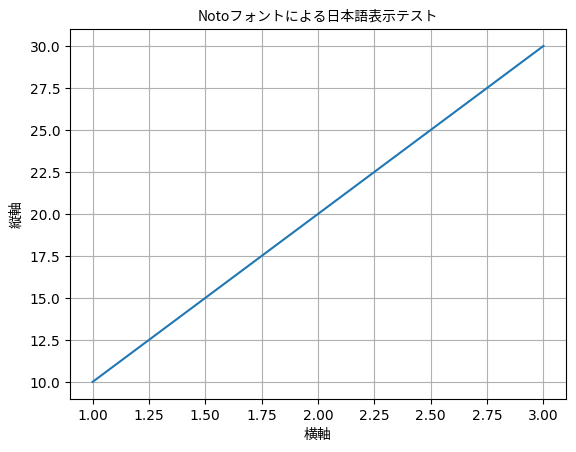

In [17]:
# ✅ Googleの日本語フォント「Noto Sans CJK JP」をインストール
!apt-get -y install fonts-noto-cjk > /dev/null

# ✅ Notoフォントを取得
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("❗フォントが見つかりません。")
    font_prop = None

# ✅ グラフを描画（フォントプロパティ指定）
plt.title("Notoフォントによる日本語表示テスト", fontproperties=font_prop)
plt.xlabel("横軸", fontproperties=font_prop)
plt.ylabel("縦軸", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 30])
plt.grid(True)
plt.show()
